# Steel Defect Detection - EDA 03

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# load common py
sys.path.append('../src')
import config
import common_utils
import data_utils
import train_utils
import plot_utils

In [3]:
IMAGE_FOLDER = os.path.join(config.DATA_FOLDER, 'train_images')
TRAIN_CSV = os.path.join(config.DATA_FOLDER, 'train.csv')
TRAIN_BBOXES_CSV = os.path.join(config.DATA_FOLDER, 'train_bboxes.csv')

In [4]:
df1 = pd.read_csv(TRAIN_CSV)
df = pd.read_csv(TRAIN_BBOXES_CSV)

df = df.merge(df1[['ImageId', 'ClassId']], on='ImageId', how='left')

In [5]:
df.head(10)

,ImageId,bboxes,ClassId
0,0002cc93b.jpg,"[[161, 113, 184, 127], [88, 304, 193, 331], [1...",1
1,0007a71bf.jpg,"[[146, 72, 255, 85], [4, 1145, 254, 1167]]",3
2,000a4bcdd.jpg,"[[206, 146, 241, 187], [202, 244, 224, 267], [...",1
3,000f6bf48.jpg,"[[0, 515, 217, 860], [126, 853, 255, 1131]]",4
4,0014fce06.jpg,"[[60, 896, 249, 929]]",3
5,0025bde0c.jpg,"[[2, 33, 106, 227], [95, 836, 176, 868], [4, 8...",3
6,0025bde0c.jpg,"[[2, 33, 106, 227], [95, 836, 176, 868], [4, 8...",4
7,0025bde0c.jpg,"[[0, 1231, 47, 1416], [65, 1389, 185, 1512]]",3
8,0025bde0c.jpg,"[[0, 1231, 47, 1416], [65, 1389, 185, 1512]]",4
9,002af848d.jpg,"[[222, 1135, 254, 1224], [189, 1382, 254, 1454]]",4


In [7]:
data_c = []

# find center points of defect bounding boxes. use center points to visualize defect distribution location
for idx, row in df.iterrows():
    image_id = row['ImageId']
    class_id = row['ClassId']
    bboxes = row['bboxes']
    #print(bboxes)
    # convert string representation of list to actual list
    bboxes = eval(bboxes)
    #print(bboxes)
    for bbox in bboxes:
        x1, y1, x2, y2 = bbox
        xc = int(x1 + (x2 - x1) / 2)
        yc = int(y1 + (y2 - y1) / 2)
        #print(xc, yc)

        data = {
            'xc': xc,
            'yc': yc,
            'class_id': class_id,
            'image_id': image_id
        }

        data_c.append(data)

    #break

data_c_df = pd.DataFrame(data_c)

In [8]:
data_c_df

,xc,yc,class_id,image_id
0,172,120,1,0002cc93b.jpg
1,140,317,1,0002cc93b.jpg
2,223,343,1,0002cc93b.jpg
3,82,359,1,0002cc93b.jpg
4,87,748,1,0002cc93b.jpg
...,...,...,...,...
22251,128,103,3,ffff4eaa8.jpg
22252,211,263,3,ffff4eaa8.jpg
22253,128,387,3,ffff4eaa8.jpg
22254,165,577,3,ffff4eaa8.jpg


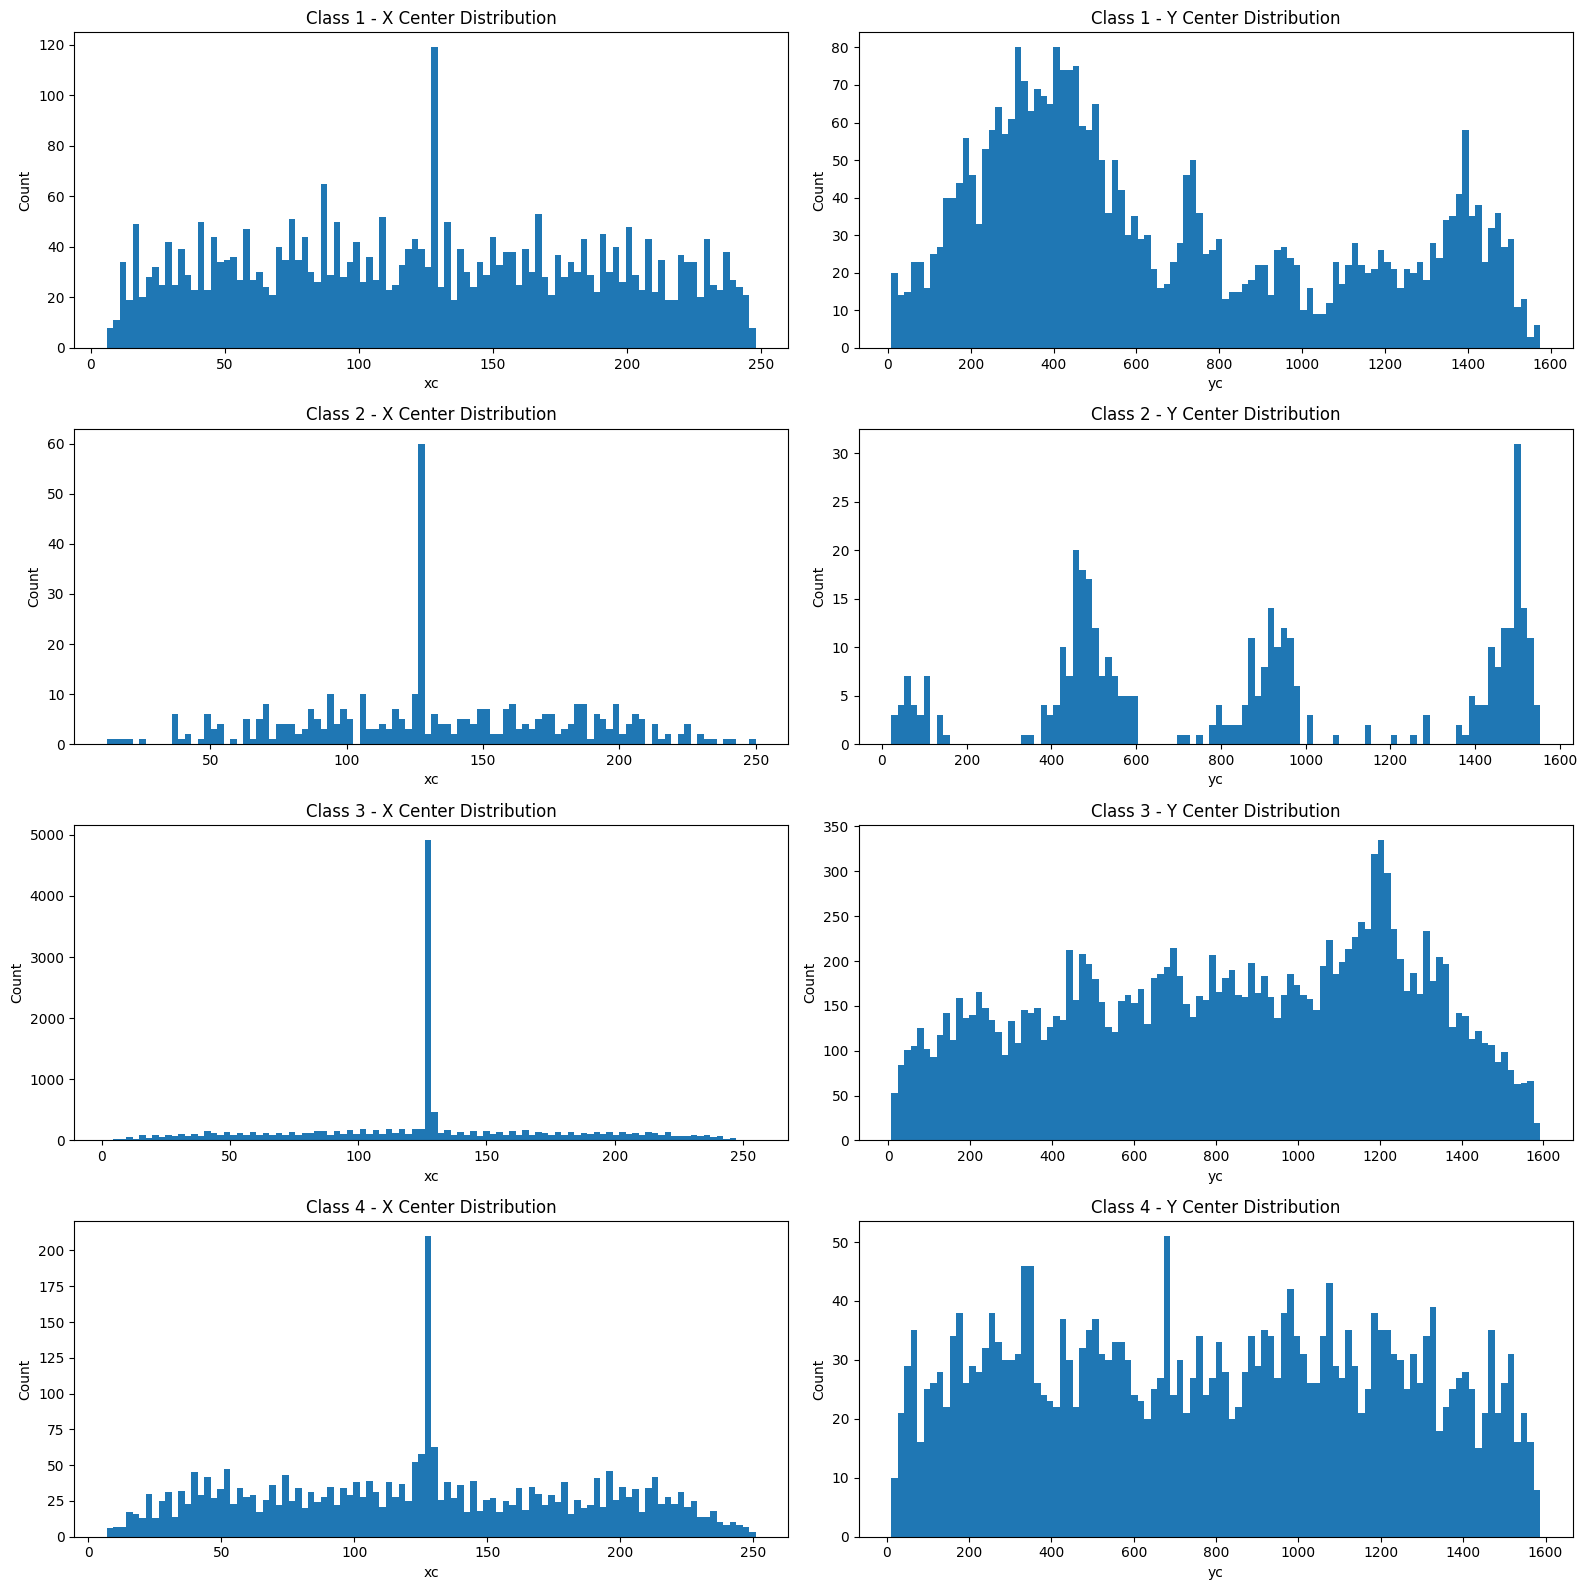

In [9]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
for i in range(1, 5):
    # X center distribution (left column)
    ax_xc = axes[i-1, 0]
    ax_xc.hist(data_c_df[data_c_df['class_id'] == i]['xc'], bins=100)
    ax_xc.set_title(f'Class {i} - X Center Distribution')
    ax_xc.set_xlabel('xc')
    ax_xc.set_ylabel('Count')

    # Y center distribution (right column)
    ax_yc = axes[i-1, 1]
    ax_yc.hist(data_c_df[data_c_df['class_id'] == i]['yc'], bins=100)
    ax_yc.set_title(f'Class {i} - Y Center Distribution')
    ax_yc.set_xlabel('yc')
    ax_yc.set_ylabel('Count')

plt.tight_layout()
plt.show()